In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\SUPREETH N\scikit_learn_data


In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oliv['data'].shape

(400, 4096)

In [5]:
oliv['images'].shape

(400, 64, 64)

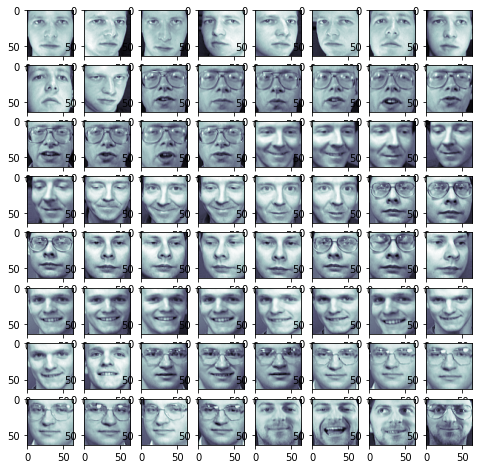

In [6]:
fig = plt.figure(figsize=(8,8))  # To Visualize these 64 images
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [7]:
x = oliv.data
y = oliv.target

In [8]:
pca = PCA()
pca.fit(x)

PCA()

In [9]:
pca.components_  # Has a shape of 400x4096

array([[-0.00419164, -0.00710946, -0.00933617, ...,  0.00018518,
         0.00337968,  0.00318828],
       [-0.02859153, -0.03328827, -0.03784633, ...,  0.02962782,
         0.02721298,  0.02488898],
       [ 0.00135688, -0.00032558, -0.00019753, ..., -0.01541372,
        -0.01370985, -0.01188347],
       ...,
       [ 0.00223503,  0.02056806,  0.01515935, ..., -0.01273614,
        -0.05849055, -0.0765029 ],
       [ 0.01714894,  0.02917833, -0.00942504, ...,  0.00159109,
         0.01249304, -0.00815324],
       [-0.00358132,  0.01017687,  0.01995866, ..., -0.01168788,
        -0.01614406, -0.00551161]], dtype=float32)

In [10]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.97:
    currentSum += pca.explained_variance_[k]
    k = k + 1
k 

169

In [11]:
pca = PCA(n_components=k, whiten=True)  
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 169)

In [12]:
x_original_approx = pca.inverse_transform(transformed_data)
x_original_approx.shape

(400, 4096)

In [13]:
x_approx_images = x_original_approx.reshape((400, 64, 64))

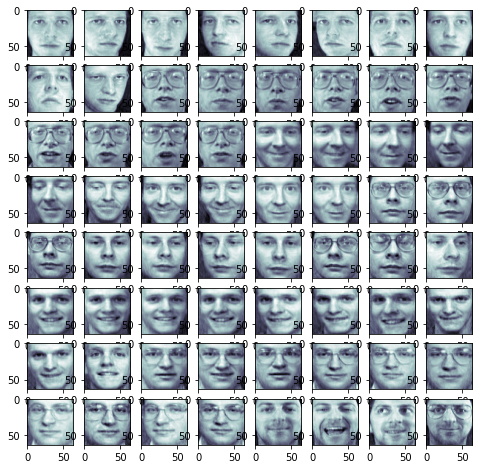

In [14]:
fig = plt.figure(figsize=(8,8))  # To Visualize these 64 traced back images 
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_images[i], cmap=plt.cm.bone)
plt.show()

In [15]:
eigen_v = pca.components_
eigen_v.shape

(169, 4096)

In [16]:
eigen_faces = eigen_v.reshape((169, 64, 64))

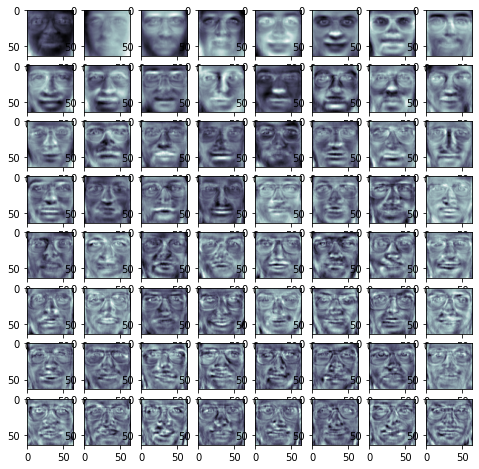

In [17]:
fig = plt.figure(figsize=(8,8))  # To Visualize these 64 after PCA applied images 
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigen_faces[i], cmap=plt.cm.bone)
plt.show()